In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import tensorflow as keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing

from sklearn.covariance import EmpiricalCovariance, MinCovDet
#from sklearn.manifold import TSNE
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)

from datetime import datetime
import time

In [2]:
!cp /content/drive/MyDrive/tsk_viewing/bsvarautonet_paper/my_checkpoint13.rar ./
!unrar e my_checkpoint13.rar ./checkpoints/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from my_checkpoint13.rar

Creating    ./checkpoints                                             OK
Extracting  ./checkpoints/my_checkpoint13.data-00000-of-00001             19% 39% 58% 78% 98% 99%  OK 
Extracting  ./checkpoints/my_checkpoint13.index                          100%  OK 
All OK


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#x_train=np.reshape(x_train,(-1,28*28))
#x_test=np.reshape(x_test,(-1,28*28))

x_test_copy=x_test.copy()

print(np.shape(y_train))
print(np.max(x_train))

temp_x_train=x_train.copy()
temp_x_train[temp_x_train>0.5]=1
temp_x_train[temp_x_train<=0.5]=0
temp_x_test=x_test.copy()
temp_x_test[temp_x_test>0.5]=1
temp_x_test[temp_x_test<=0.5]=0
#y_train=np.concatenate((x_train,1-x_train),axis=1)
#y_test=np.concatenate((x_test,1-x_test),axis=1)

print(np.shape(y_train))



#plt.imshow(x_train[0,:,:])
#plt.show()
#exit(1)

x_train=x_train.reshape((-1, 28*28))
x_test=x_test.reshape((-1, 28*28))

11490434/11490434 [==============================] - 0s 0us/step
(60000,)
1.0
(60000,)


In [4]:
dim=8#8
'''
x_train_new=np.zeros((x_train.shape[0],x_train.shape[1],dim))
a1=x_train*dim-(x_train*dim).astype(int)
a2=(x_train*dim).astype(int)
for i in range(0,dim):
    temp=a1.copy()
    temp[a2!=i]==0
    x_train_new[:,:,i]=temp
x_train=np.reshape(x_train_new,(-1,28*28*dim))
print('convert each input into 8 dimensions')
x_test_new=np.zeros((x_test.shape[0],x_test.shape[1],dim))
a1=x_test*dim-(x_test*dim).astype(int)
a2=(x_test*dim).astype(int)
for i in range(0,dim):
    temp=a1.copy()
    temp[a2!=i]==0
    x_test_new[:,:,i]=temp
x_test=np.reshape(x_test_new,(-1,28*28*dim))
print('convert each input into 8 dimensions')
#'''

y_test_save=y_test.copy()
y_train_save=y_train.copy()
y_train=x_train.copy()
y_test=x_test.copy()

np.random.seed(1000)
a=(np.array(np.random.rand(x_train.shape[0],x_train.shape[1])>0.3)).astype(float)#0.3#,x_train.shape[2]
#a=1*(np.array(np.random.rand(x_train.shape[0],x_train.shape[1],x_train.shape[2]))).astype(float)#0.3
#np.random.seed(1010)
#b=1*(np.array(np.random.rand(x_train.shape[0],x_train.shape[1],x_train.shape[2]))).astype(float)#0.3
#np.random.seed(1020)
#c=1*(np.array(np.random.rand(x_train.shape[0],x_train.shape[1],x_train.shape[2]))).astype(float)#0.3
x_train=np.maximum(a,x_train)
#x_train=a+x_train

#'''
x_train_new=np.zeros((x_train.shape[0],x_train.shape[1],dim))
a2=(x_train*((2**dim)*1-1e-10)).astype(int)
for i in range(0,dim):
    x_train_new[:,:,i]=a2%2
    a2=a2//2
    #x_train_new[:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//2
x_train=np.reshape(x_train_new,(-1,28*28*dim))
print('convert each input into 8 dimensions')
x_test_new=np.zeros((x_test.shape[0],x_test.shape[1],dim))
a2=(x_test*((2**dim)*1-1e-10)).astype(int)
for i in range(0,dim):
    x_test_new[:,:,i]=a2%2
    a2=a2//2
    #x_test_new[:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//2
x_test=np.reshape(x_test_new,(-1,28*28*dim))
print('convert each input into 8 dimensions')
#'''

convert each input into 8 dimensions
convert each input into 8 dimensions


In [5]:
'''
#'''#tf.keras.constraints.MinMaxNorm(min_value=0.0, max_value=100.0, rate=1.0, axis=0)
#bias_constraint=tf.keras.constraints.NonNeg()
x_in=Input(shape=(28*28*dim,))#
#x_in = Input(shape=(8,))

initializer = tf.keras.initializers.RandomUniform(minval=0, maxval=0.05, seed=None)

#"""Initially
x = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_in, -x_in]))
x_1 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x, -x]))#400
x_2 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_1, -x_1,x,-x]))
#x_2_1=Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x, -x]))
x_3 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_2, -x_2,x,-x]))
#x_3=x_2_1+x_3_1
x_4 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_3, -x_3,x,-x]))
#x_4_1=Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x, -x]))
x_5 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_4, -x_4]))#([x_4, -x_4]))#,x_in,-x_in
#x_5=x_5_1+x_4_1

x_6 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_5, -x_5]))
x_7 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_6, -x_6,x_5, -x_5]))
#x_7=Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg(),)(Concatenate(axis=1)([x_5, -x_5]))
x_8 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_7, -x_7,x_5, -x_5]))
#x_8=x_8_1+x_7_1
x_9 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_8, -x_8,x_5, -x_5]))
#x_9_1 = Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_5, -x_5]))
x_10 = Dense(100, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_9, -x_9,x_5, -x_5]))#([x_9, -x_9]))
#x_10=x_10_1+x_9_1
x_out = Dense(28*28*dim, activation='sigmoid', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_10, -x_10]))#,x_5,-x_5

x_out2=tf.reshape(x_out,[-1,28,28,dim])

#for i in range(0,32):
#    x_out3=x_out2[:,:,:,i]*(2**i)
#x_out3=x_out3/(2**32)
x_out3=(x_out2[:,:,:,0]*1+x_out2[:,:,:,1]*2+x_out2[:,:,:,2]*4+x_out2[:,:,:,3]*8+x_out2[:,:,:,4]*16+x_out2[:,:,:,5]*32+x_out2[:,:,:,6]*64+x_out2[:,:,:,7]*128)/256
x_out4=tf.reshape(x_out3,[-1,28*28])

In [6]:
model = Model(inputs=x_in, outputs=x_out4)

# compile the keras model
optimizer = keras.optimizers.legacy.Adam(lr=0.0001)#lr=0.001#0.0001
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])#optimizer='adam'
##model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy'])
###model.compile(loss=macro_soft_f1, optimizer=optimizer, metrics=['accuracy'])
model.compile(loss='mae', optimizer=optimizer)
# fit the keras model on the dataset
###model.fit(x=x_train, y=y_train, epochs=150, batch_size=100, validation_data=(x_test, y_test))#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000

#'''
# Restore the weights
model.load_weights('./checkpoints/my_checkpoint13')

print(model.summary())
print(len(model.layers))

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6272)]               0         []                            
                                                                                                  
 tf.math.negative (TFOpLamb  (None, 6272)                 0         ['input_1[0][0]']             
 da)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 12544)                0         ['input_1[0][0]',             
                                                                     'tf.math.negative[0][0]']    
                                                                                              

In [22]:
#model.summary()
newmodel = Model(inputs=model.get_layer('dense_5').input, outputs=model.layers[-1].output)#dense_5 dense_6#.get_layer("dense_11")
newmodel2 = Model(inputs=model.layers[0].input, outputs=model.get_layer('dense_4').output)#dense_4 dense_5

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6272)]               0         []                            
                                                                                                  
 tf.math.negative (TFOpLamb  (None, 6272)                 0         ['input_1[0][0]']             
 da)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 12544)                0         ['input_1[0][0]',             
                                                                     'tf.math.negative[0][0]']    
                                                                                              

313/313 [==============================] - 6s 18ms/step
(10000, 6272)


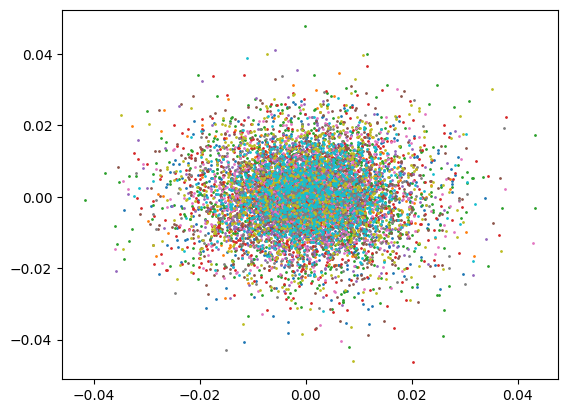

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.038s...
[t-SNE] Computed neighbors for 10000 samples in 53.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.043285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 214.142151
[t-SNE] KL divergence after 1000 iterations: 7.004681


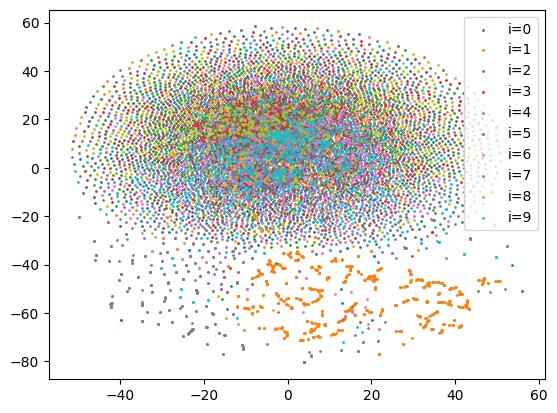

In [23]:
test_mid=newmodel2.predict(np.reshape(x_test,(-1,28*28*8)))
#print(np.shape(test_mid))
#sstd=np.std(test_mid,axis=0)
#plt.hist(sstd)
#plt.show()
#for i in range(0,100):
#  test_mid[:,i]=test_mid[:,i]/sstd[i]
#sstd=np.std(test_mid,axis=0)
#print(sstd)
#plt.hist(sstd)
#plt.show()

def svd_whiten(X):

    U, s, Vt = np.linalg.svd(X, full_matrices=False)

    #print(s)
    # U and Vt are the singular matrices, and s contains the singular values.
    # Since the rows of both U and Vt are orthonormal vectors, then U * Vt
    # will be white
    X_white = np.dot(U, Vt)

    return X_white

test_mid=svd_whiten(test_mid)

#print(test_mid[0:10,:])

print(np.shape(test_mid))
pca = PCA(n_components=2)
#test_mid2=pca.fit_transform(test_mid)
#scaler = preprocessing.StandardScaler().fit(test_mid)
#test_mid2 = scaler.transform(test_mid)
test_mid2=pca.fit_transform(test_mid)
#test_mid2=pca.fit_transform(test_mid[:,test_mid.shape[1]//2:])
#for i in range(0,10):
#    print(test_mid2[y_test_save==i,:])
#    plt.figure()
#    plt.imshow(test_mid[y_test_save==i,:])
#plt.show()
for i in range(0,10):
    labels=y_test_save.copy()
    labels=labels.astype(int)
    labels[labels!=i]=-1
    labels[labels==i]=1
    labels[labels==-1]=0
    #plt.scatter(test_mid2[labels==0,0],test_mid2[labels==0,1],s=1)
    #plt.figure()
    plt.scatter(test_mid2[labels==1,0],test_mid2[labels==1,1],s=1)
    #plt.show()
    #lda = LinearDiscriminantAnalysis(n_components=1)
    #test_mid3 = lda.fit(test_mid2, labels).transform(test_mid2)
    #plt.hist(test_mid3[labels==0])
    #plt.hist(test_mid3[labels==1])
    #plt.show()
    #plt.scatter(test_mid2[y_test_save==i,0],test_mid2[y_test_save==i,1])
plt.show()

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3,verbose=1).fit_transform(test_mid)
#X_embedded=LocallyLinearEmbedding(n_neighbors=100, n_components=2, method="standard").fit_transform(test_mid)
for i in range(0,10):
  plt.scatter(X_embedded[y_test_save==i,0],X_embedded[y_test_save==i,1],s=1,label="i="+str(i))
plt.legend()
plt.show()

In [ ]:
test_mid=newmodel2.predict(np.reshape(x_test[y_test_save>=0,:],(-1,28*28*8)))
U, s, Vt = np.linalg.svd(test_mid, full_matrices=False)

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(test_mid)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(test_mid)
print(
    "Estimated covariance matrix:\nMCD (Robust):\n{}\nMLE:\n{}".format(
        robust_cov.covariance_, emp_cov.covariance_
    )
)
cov=robust_cov.covariance_
#cov=np.cov(test_mid.T)#/2
print(np.shape(cov))

mea=np.mean(test_mid,axis=0)
print(np.shape(mea))
np.random.seed(int(time.time()))
test_mid2=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)


#test_mid2=np.multiply(np.random.rand(len(s)),s)
#test_mid3=np.multiply(np.random.rand(len(s)),s)

313/313 [==============================] - 1s 4ms/step
Estimated covariance matrix:
MCD (Robust):
[[ 4.19442957  0.48074461 -1.38677014 ...  1.8866916   1.25986482
   0.93906454]
 [ 0.48074461  2.20142732  2.4714154  ... -1.7559232   3.01402568
  -0.8621745 ]
 [-1.38677014  2.4714154   8.41441006 ... -4.61488265  5.1298835
  -1.11408398]
 ...
 [ 1.8866916  -1.7559232  -4.61488265 ...  7.70162103 -1.82398155
  -0.02331024]
 [ 1.25986482  3.01402568  5.1298835  ... -1.82398155 10.63028834
  -3.21175441]
 [ 0.93906454 -0.8621745  -1.11408398 ... -0.02331024 -3.21175441
   5.87643353]]
MLE:
[[ 4.48979142e+00  4.00692684e-01 -1.42342508e+00 ...  2.25234039e+00
   1.56957471e+00  9.63539662e-01]
 [ 4.00692684e-01  2.12982483e+00  1.97004973e+00 ... -1.34102994e+00
   2.53571744e+00 -1.06437888e+00]
 [-1.42342508e+00  1.97004973e+00  8.72637029e+00 ... -4.86965651e+00
   4.30366688e+00 -1.06827305e+00]
 ...
 [ 2.25234039e+00 -1.34102994e+00 -4.86965651e+00 ...  7.91413216e+00
  -1.06676656e+0

1/1 [==============================] - 0s 18ms/step
[0. 1.]
(1, 100)
1/1 [==============================] - 0s 17ms/step
[0.03333333 0.96666667]
(1, 100)
1/1 [==============================] - 0s 19ms/step
[0.06666667 0.93333333]
(1, 100)
1/1 [==============================] - 0s 16ms/step
[0.1 0.9]
(1, 100)
1/1 [==============================] - 0s 20ms/step
[0.13333333 0.86666667]
(1, 100)
1/1 [==============================] - 0s 20ms/step
[0.16666667 0.83333333]
(1, 100)
1/1 [==============================] - 0s 21ms/step
[0.2 0.8]
(1, 100)
1/1 [==============================] - 0s 18ms/step
[0.23333333 0.76666667]
(1, 100)
1/1 [==============================] - 0s 16ms/step
[0.26666667 0.73333333]
(1, 100)
1/1 [==============================] - 0s 15ms/step
[0.3 0.7]
(1, 100)
1/1 [==============================] - 0s 15ms/step
[0.33333333 0.66666667]
(1, 100)
1/1 [==============================] - 0s 15ms/step
[0.36666667 0.63333333]
(1, 100)
1/1 [==============================] -

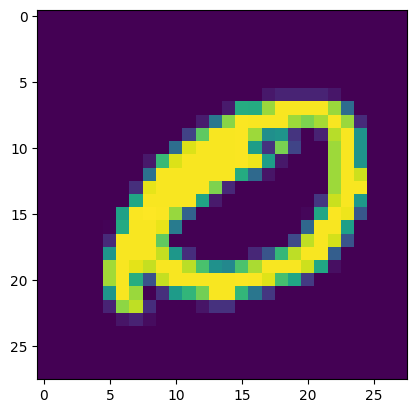

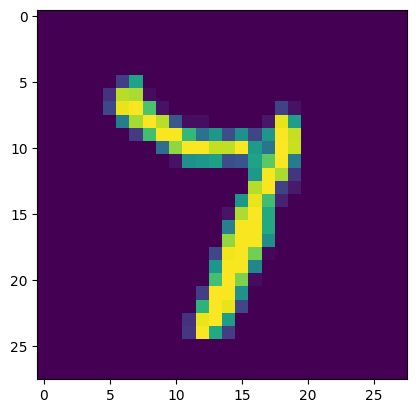

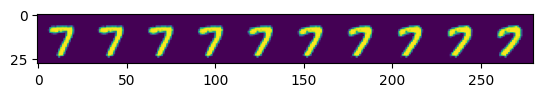

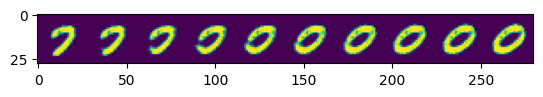

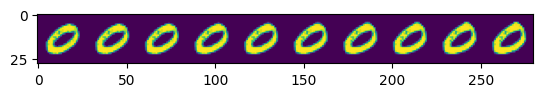

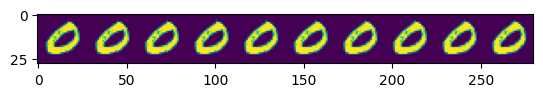

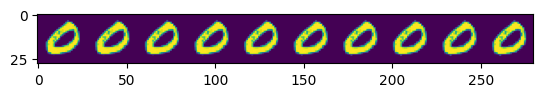

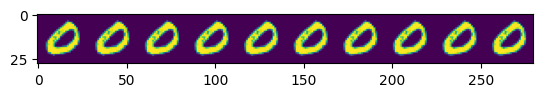

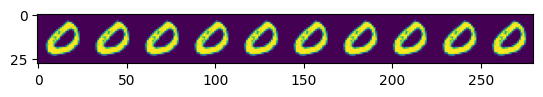

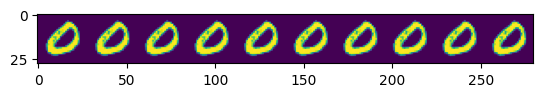

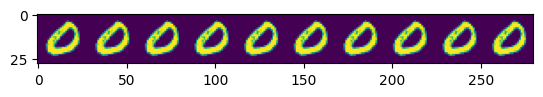

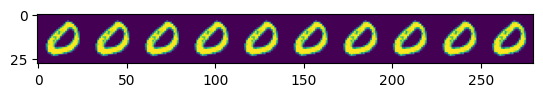

In [ ]:
np.random.seed(int(time.time()))
n=2
index=np.where(y_test_save==2)
index=index[0]
b=(np.floor(np.random.rand(n)*10000)).astype(int)
#b=(np.floor(np.random.rand(n)*len(index))).astype(int)
#print(index)
#b=index[b]
#b2=(np.random.rand(n)*10000)
#b2=b2/n
x_test_tempo=x_test[b,:].copy()
test_mid=newmodel2.predict(np.reshape(x_test_tempo,(n,28*28*8)))#n
#test_mid2=np.random.multivariate_normal(np.zeros(100), cov, size=1)
#test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
#test_mid[0,:]=test_mid2
#test_mid[1,:]=test_mid3

test_out_big=np.zeros((28*1,28*100))
for i in range(0,100):
    b2=np.array([i/30,1-i/30])
    #b2=(b2-0.5)*2+0.5
    print(b2)
    #b3=0.5#(np.random.rand(1)
    test_in=np.reshape(x_test[b,:],(n,28,28,8))
    #test_in2=np.reshape(x_test[b2,:],(28,28,4))
    #test_mid=newmodel2.predict(np.reshape(x_test[b,:],(n,28*28*8)))#n
    #print(np.shape(test_mid))
    #test_mid2=newmodel2.predict(np.reshape(test_in2,(1,28*28*4)))
    temp=np.reshape(np.sum(test_mid*np.tile(np.reshape(b2,(n,1)),(1,100)),axis=0),(1,100))
    print(np.shape(temp))
    #temp=test_mid*b3+test_mid2*(1-b3)
    #test_mid=np.squeeze(test_mid)
    #temp=np.concatenate((test_mid,-test_mid,np.mean(x_test[b,:],axis=0),-np.mean(x_test[b,:],axis=0)),axis=0)#axis=1
    temp=np.concatenate((temp,-temp),axis=1)#axis=1
    #temp=np.reshape(temp,(1,len(temp)))
    test_out=newmodel.predict(temp)
    test_out=np.reshape(test_out,(28,28))
    j=0
    test_out_big[j*28:(j+1)*28,i*28:(i+1)*28]=test_out
    #print(b3)
    #for i in range(0,n):
        #plt.figure()
        #plt.imshow(test_in[:,:,0]*1+test_in[:,:,1]*2+test_in[:,:,2]*4+test_in[:,:,3]*8)
        #plt.imshow(test_in[i,:,:,0]*1+test_in[i,:,:,1]*2+test_in[i,:,:,2]*4+test_in[i,:,:,3]*8+test_in[i,:,:,4]*16+test_in[i,:,:,5]*32+test_in[i,:,:,6]*64+test_in[i,:,:,7]*128)
    #plt.figure()
    #plt.imshow(test_in2[:,:,0]*1+test_in2[:,:,1]*2+test_in2[:,:,2]*4+test_in2[:,:,3]*8)
    #plt.figure()
    #plt.imshow(test_out)
    #plt.show()
    #exit(1)
plt.figure()
plt.imshow(x_test_copy[b[0],:,:])
plt.figure()
plt.imshow(x_test_copy[b[1],:,:])
for i in range(0,10):
    plt.figure()
    plt.imshow(test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28])
plt.show()

1/1 [==============================] - 0s 19ms/step
[0. 1.]
(1, 100)
1/1 [==============================] - 0s 23ms/step
i=0
[0.03333333 0.96666667]
(1, 100)
1/1 [==============================] - 0s 32ms/step
i=1
[0.06666667 0.93333333]
(1, 100)
1/1 [==============================] - 0s 23ms/step
i=2
[0.1 0.9]
(1, 100)
1/1 [==============================] - 0s 33ms/step
i=3
[0.13333333 0.86666667]
(1, 100)
1/1 [==============================] - 0s 31ms/step
i=4
[0.16666667 0.83333333]
(1, 100)
1/1 [==============================] - 0s 29ms/step
i=5
[0.2 0.8]
(1, 100)
1/1 [==============================] - 0s 26ms/step
i=6
[0.23333333 0.76666667]
(1, 100)
1/1 [==============================] - 0s 27ms/step
i=7
[0.26666667 0.73333333]
(1, 100)
1/1 [==============================] - 0s 26ms/step
i=8
[0.3 0.7]
(1, 100)
1/1 [==============================] - 0s 30ms/step
i=9
[0.33333333 0.66666667]
(1, 100)
1/1 [==============================] - 0s 28ms/step
i=10
[0.36666667 0.63333333]
(1

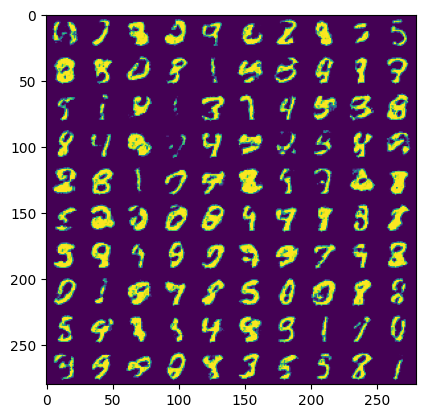

In [ ]:
def binarized(x_test):
  x_test_new=np.zeros((x_test.shape[0],x_test.shape[1],dim))
  a2=(x_test*((2**dim)*1-1e-10)).astype(int)
  for i in range(0,dim):
    x_test_new[:,:,i]=a2%2
    a2=a2//2
    #x_test_new[:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//2
  x_test=np.reshape(x_test_new,(-1,28*28*dim))
  return x_test

np.random.seed(int(time.time()))
n=2
index=np.where(y_test_save==2)
index=index[0]
b=(np.floor(np.random.rand(n)*10000)).astype(int)
#b=(np.floor(np.random.rand(n)*len(index))).astype(int)
#print(index)
#b=index[b]
#b2=(np.random.rand(n)*10000)
#b2=b2/n
x_test_tempo=x_test[b,:].copy()
test_mid=newmodel2.predict(np.reshape(x_test_tempo,(n,28*28*8)))#n
test_mid2=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid[0,:]=test_mid2
test_mid[1,:]=test_mid3

test_out_big=np.zeros((28*1,28*100))
for i in range(0,100):
    b2=np.array([i/30,1-i/30])
    #b2=(b2-0.5)*2+0.5
    print(b2)
    #b3=0.5#(np.random.rand(1)
    test_in=np.reshape(x_test[b,:],(n,28,28,8))
    #test_in2=np.reshape(x_test[b2,:],(28,28,4))
    #test_mid=newmodel2.predict(np.reshape(x_test[b,:],(n,28*28*8)))#n
    test_mid2=np.random.multivariate_normal(mea+(10000*np.random.rand(100)-5000), cov, size=1)
    #test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
    test_mid=test_mid2
    #test_mid[1,:]=test_mid3

    #print(np.shape(test_mid))
    #test_mid2=newmodel2.predict(np.reshape(test_in2,(1,28*28*4)))
    #temp=np.reshape(np.sum(test_mid*np.tile(np.reshape(b2,(n,1)),(1,100)),axis=0),(1,100))
    temp=test_mid
    print(np.shape(temp))
    #temp=test_mid*b3+test_mid2*(1-b3)
    #test_mid=np.squeeze(test_mid)
    #temp=np.concatenate((test_mid,-test_mid,np.mean(x_test[b,:],axis=0),-np.mean(x_test[b,:],axis=0)),axis=0)#axis=1
    temp=np.concatenate((temp,-temp),axis=1)#axis=1
    #temp=np.reshape(temp,(1,len(temp)))
    test_out=newmodel.predict(temp)

    '''
    for repeat in range(0,5):#5
      a=(np.array(np.random.rand(test_out.shape[0],test_out.shape[1])>0.4)).astype(float)#0.3#,x_train.shape[2]
      test_out=np.maximum(a,test_out)
      #if repeat==1:
      #  test_out=a

      test_out=binarized(test_out)
      test_out=model.predict(test_out)
    #'''

    test_out=np.reshape(test_out,(28,28))
    j=0
    test_out_big[j*28:(j+1)*28,i*28:(i+1)*28]=test_out
    print('i='+str(i))

    #print(b3)
    #for i in range(0,n):
        #plt.figure()
        #plt.imshow(test_in[:,:,0]*1+test_in[:,:,1]*2+test_in[:,:,2]*4+test_in[:,:,3]*8)
        #plt.imshow(test_in[i,:,:,0]*1+test_in[i,:,:,1]*2+test_in[i,:,:,2]*4+test_in[i,:,:,3]*8+test_in[i,:,:,4]*16+test_in[i,:,:,5]*32+test_in[i,:,:,6]*64+test_in[i,:,:,7]*128)
    #plt.figure()
    #plt.imshow(test_in2[:,:,0]*1+test_in2[:,:,1]*2+test_in2[:,:,2]*4+test_in2[:,:,3]*8)
    #plt.figure()
    #plt.imshow(test_out)
    #plt.show()
    #exit(1)
#plt.figure()
#plt.imshow(x_test_copy[b[0],:,:])
#plt.figure()
#plt.imshow(x_test_copy[b[1],:,:])
temp_out=[]
for i in range(0,10):
    #plt.figure()
    #plt.imshow(test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28])
    if i==0:
        temp_out=test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28]
    else:
        temp_out=np.concatenate((temp_out,test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28]),axis=0)
plt.imshow(temp_out)
plt.show()

1/1 [==============================] - 0s 20ms/step
[0. 1.]
(1, 100)
1/1 [==============================] - 0s 28ms/step
i=0
[0.03333333 0.96666667]
(1, 100)
1/1 [==============================] - 0s 28ms/step
i=1
[0.06666667 0.93333333]
(1, 100)
1/1 [==============================] - 0s 28ms/step
i=2
[0.1 0.9]
(1, 100)
1/1 [==============================] - 0s 36ms/step
i=3
[0.13333333 0.86666667]
(1, 100)
1/1 [==============================] - 0s 32ms/step
i=4
[0.16666667 0.83333333]
(1, 100)
1/1 [==============================] - 0s 27ms/step
i=5
[0.2 0.8]
(1, 100)
1/1 [==============================] - 0s 27ms/step
i=6
[0.23333333 0.76666667]
(1, 100)
1/1 [==============================] - 0s 19ms/step
i=7
[0.26666667 0.73333333]
(1, 100)
1/1 [==============================] - 0s 24ms/step
i=8
[0.3 0.7]
(1, 100)
1/1 [==============================] - 0s 19ms/step
i=9
[0.33333333 0.66666667]
(1, 100)
1/1 [==============================] - 0s 19ms/step
i=10
[0.36666667 0.63333333]
(1

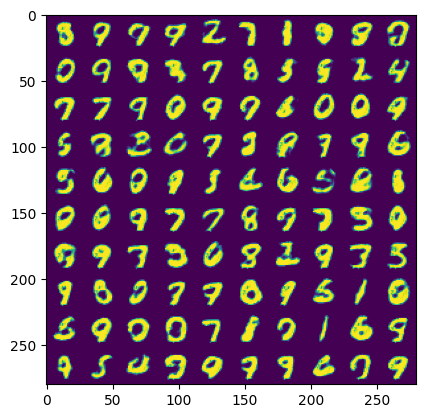

In [ ]:
def binarized(x_test):
  x_test_new=np.zeros((x_test.shape[0],x_test.shape[1],dim))
  a2=(x_test*((2**dim)*1-1e-10)).astype(int)
  for i in range(0,dim):
    x_test_new[:,:,i]=a2%2
    a2=a2//2
    #x_test_new[:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//2
  x_test=np.reshape(x_test_new,(-1,28*28*dim))
  return x_test

np.random.seed(int(time.time()))
n=2
index=np.where(y_test_save==2)
index=index[0]
b=(np.floor(np.random.rand(n)*10000)).astype(int)
#b=(np.floor(np.random.rand(n)*len(index))).astype(int)
#print(index)
#b=index[b]
#b2=(np.random.rand(n)*10000)
#b2=b2/n
x_test_tempo=x_test[b,:].copy()
test_mid=newmodel2.predict(np.reshape(x_test_tempo,(n,28*28*8)))#n
test_mid2=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid[0,:]=test_mid2
test_mid[1,:]=test_mid3

test_out_big=np.zeros((28*1,28*100))
for i in range(0,100):
    b2=np.array([i/30,1-i/30])
    #b2=(b2-0.5)*2+0.5
    print(b2)
    #b3=0.5#(np.random.rand(1)
    test_in=np.reshape(x_test[b,:],(n,28,28,8))
    #test_in2=np.reshape(x_test[b2,:],(28,28,4))
    #test_mid=newmodel2.predict(np.reshape(x_test[b,:],(n,28*28*8)))#n
    test_mid2=np.random.multivariate_normal(mea+(2*np.random.rand(100)-1), cov, size=1)
    #test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
    test_mid=test_mid2
    #test_mid[1,:]=test_mid3

    #print(np.shape(test_mid))
    #test_mid2=newmodel2.predict(np.reshape(test_in2,(1,28*28*4)))
    #temp=np.reshape(np.sum(test_mid*np.tile(np.reshape(b2,(n,1)),(1,100)),axis=0),(1,100))
    temp=test_mid
    print(np.shape(temp))
    #temp=test_mid*b3+test_mid2*(1-b3)
    #test_mid=np.squeeze(test_mid)
    #temp=np.concatenate((test_mid,-test_mid,np.mean(x_test[b,:],axis=0),-np.mean(x_test[b,:],axis=0)),axis=0)#axis=1
    temp=np.concatenate((temp,-temp),axis=1)#axis=1
    #temp=np.reshape(temp,(1,len(temp)))
    test_out=newmodel.predict(temp)

    '''
    for repeat in range(0,5):#5
      a=(np.array(np.random.rand(test_out.shape[0],test_out.shape[1])>0.4)).astype(float)#0.3#,x_train.shape[2]
      test_out=np.maximum(a,test_out)
      #if repeat==1:
      #  test_out=a

      test_out=binarized(test_out)
      test_out=model.predict(test_out)
    #'''

    test_out=np.reshape(test_out,(28,28))
    j=0
    test_out_big[j*28:(j+1)*28,i*28:(i+1)*28]=test_out
    print('i='+str(i))

    #print(b3)
    #for i in range(0,n):
        #plt.figure()
        #plt.imshow(test_in[:,:,0]*1+test_in[:,:,1]*2+test_in[:,:,2]*4+test_in[:,:,3]*8)
        #plt.imshow(test_in[i,:,:,0]*1+test_in[i,:,:,1]*2+test_in[i,:,:,2]*4+test_in[i,:,:,3]*8+test_in[i,:,:,4]*16+test_in[i,:,:,5]*32+test_in[i,:,:,6]*64+test_in[i,:,:,7]*128)
    #plt.figure()
    #plt.imshow(test_in2[:,:,0]*1+test_in2[:,:,1]*2+test_in2[:,:,2]*4+test_in2[:,:,3]*8)
    #plt.figure()
    #plt.imshow(test_out)
    #plt.show()
    #exit(1)
#plt.figure()
#plt.imshow(x_test_copy[b[0],:,:])
#plt.figure()
#plt.imshow(x_test_copy[b[1],:,:])
temp_out=[]
for i in range(0,10):
    #plt.figure()
    #plt.imshow(test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28])
    if i==0:
        temp_out=test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28]
    else:
        temp_out=np.concatenate((temp_out,test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28]),axis=0)
plt.imshow(temp_out)
plt.show()

1/1 [==============================] - 0s 19ms/step
[0. 1.]
(1, 100)
1/1 [==============================] - 0s 17ms/step
i=0
[0.03333333 0.96666667]
(1, 100)
1/1 [==============================] - 0s 15ms/step
i=1
[0.06666667 0.93333333]
(1, 100)
1/1 [==============================] - 0s 21ms/step
i=2
[0.1 0.9]
(1, 100)
1/1 [==============================] - 0s 17ms/step
i=3
[0.13333333 0.86666667]
(1, 100)
1/1 [==============================] - 0s 18ms/step
i=4
[0.16666667 0.83333333]
(1, 100)
1/1 [==============================] - 0s 17ms/step
i=5
[0.2 0.8]
(1, 100)
1/1 [==============================] - 0s 17ms/step
i=6
[0.23333333 0.76666667]
(1, 100)
1/1 [==============================] - 0s 18ms/step
i=7
[0.26666667 0.73333333]
(1, 100)
1/1 [==============================] - 0s 21ms/step
i=8
[0.3 0.7]
(1, 100)
1/1 [==============================] - 0s 18ms/step
i=9
[0.33333333 0.66666667]
(1, 100)
1/1 [==============================] - 0s 23ms/step
i=10
[0.36666667 0.63333333]
(1

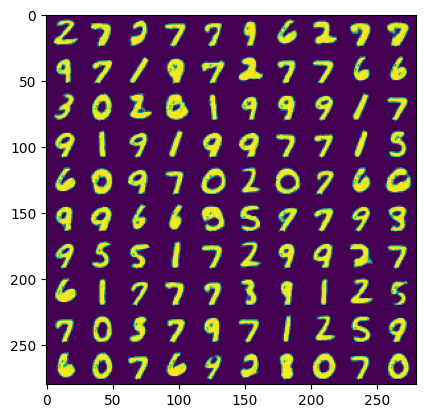

In [ ]:
def binarized(x_test):
  x_test_new=np.zeros((x_test.shape[0],x_test.shape[1],dim))
  a2=(x_test*((2**dim)*1-1e-10)).astype(int)
  for i in range(0,dim):
    x_test_new[:,:,i]=a2%2
    a2=a2//2
    #x_test_new[:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//2
  x_test=np.reshape(x_test_new,(-1,28*28*dim))
  return x_test

np.random.seed(int(time.time()))
n=2
index=np.where(y_test_save==2)
index=index[0]
b=(np.floor(np.random.rand(n)*10000)).astype(int)
#b=(np.floor(np.random.rand(n)*len(index))).astype(int)
#print(index)
#b=index[b]
#b2=(np.random.rand(n)*10000)
#b2=b2/n
x_test_tempo=x_test[b,:].copy()
test_mid=newmodel2.predict(np.reshape(x_test_tempo,(n,28*28*8)))#n
test_mid2=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
test_mid[0,:]=test_mid2
test_mid[1,:]=test_mid3

test_out_big=np.zeros((28*1,28*100))
for i in range(0,100):
    b2=np.array([i/30,1-i/30])
    #b2=(b2-0.5)*2+0.5
    print(b2)
    #b3=0.5#(np.random.rand(1)
    test_in=np.reshape(x_test[b,:],(n,28,28,8))
    #test_in2=np.reshape(x_test[b2,:],(28,28,4))
    #test_mid=newmodel2.predict(np.reshape(x_test[b,:],(n,28*28*8)))#n
    test_mid2=np.random.multivariate_normal(mea+(2*np.random.rand(100)-1), cov, size=1)
    #test_mid3=np.random.multivariate_normal(np.zeros(100), cov, size=1)
    test_mid=test_mid2
    #test_mid[1,:]=test_mid3

    #print(np.shape(test_mid))
    #test_mid2=newmodel2.predict(np.reshape(test_in2,(1,28*28*4)))
    #temp=np.reshape(np.sum(test_mid*np.tile(np.reshape(b2,(n,1)),(1,100)),axis=0),(1,100))
    temp=test_mid
    print(np.shape(temp))
    #temp=test_mid*b3+test_mid2*(1-b3)
    #test_mid=np.squeeze(test_mid)
    #temp=np.concatenate((test_mid,-test_mid,np.mean(x_test[b,:],axis=0),-np.mean(x_test[b,:],axis=0)),axis=0)#axis=1
    temp=np.concatenate((temp,-temp),axis=1)#axis=1
    #temp=np.reshape(temp,(1,len(temp)))
    test_out=newmodel.predict(temp)

    #'''
    for repeat in range(0,5):#5
      a=(np.array(np.random.rand(test_out.shape[0],test_out.shape[1])>0.4)).astype(float)#0.3#,x_train.shape[2]
      test_out=np.maximum(a,test_out)
      #if repeat==1:
      #  test_out=a

      test_out=binarized(test_out)
      test_out=model.predict(test_out)
    #'''

    test_out=np.reshape(test_out,(28,28))
    j=0
    test_out_big[j*28:(j+1)*28,i*28:(i+1)*28]=test_out
    print('i='+str(i))

    #print(b3)
    #for i in range(0,n):
        #plt.figure()
        #plt.imshow(test_in[:,:,0]*1+test_in[:,:,1]*2+test_in[:,:,2]*4+test_in[:,:,3]*8)
        #plt.imshow(test_in[i,:,:,0]*1+test_in[i,:,:,1]*2+test_in[i,:,:,2]*4+test_in[i,:,:,3]*8+test_in[i,:,:,4]*16+test_in[i,:,:,5]*32+test_in[i,:,:,6]*64+test_in[i,:,:,7]*128)
    #plt.figure()
    #plt.imshow(test_in2[:,:,0]*1+test_in2[:,:,1]*2+test_in2[:,:,2]*4+test_in2[:,:,3]*8)
    #plt.figure()
    #plt.imshow(test_out)
    #plt.show()
    #exit(1)
#plt.figure()
#plt.imshow(x_test_copy[b[0],:,:])
#plt.figure()
#plt.imshow(x_test_copy[b[1],:,:])
temp_out=[]
for i in range(0,10):
    #plt.figure()
    #plt.imshow(test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28])
    if i==0:
        temp_out=test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28]
    else:
        temp_out=np.concatenate((temp_out,test_out_big[j*28:(j+1)*28,i*10*28:(i*10+10)*28]),axis=0)
plt.imshow(temp_out)
plt.show()